<a href="https://colab.research.google.com/github/ClaFlorez/choisir-algoritme-ML/blob/main/exemple_GaussianNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Précision: 1.0


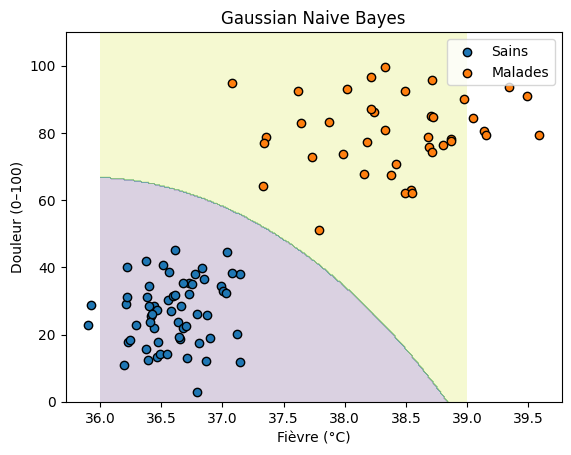

In [2]:
import numpy as np, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# 2) Données synthétiques : patients sains vs malades
rng = np.random.default_rng(0)
X_sains   = rng.normal([36.6, 25], [0.3, 10], size=(60,2))
X_malades = rng.normal([38.5, 80], [0.6, 12], size=(40,2))
X = np.vstack([X_sains, X_malades])
y = np.array(["Sain"]*60 + ["Malade"]*40)

# 3) Entraînement du modèle
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
clf = GaussianNB().fit(X_train, y_train)
print("Précision:", clf.score(X_test, y_test))

# 4) Visualisation
xx, yy = np.meshgrid(np.linspace(36, 39, 300), np.linspace(0, 110, 300))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Convert string labels to numerical values for plotting
Z_numeric = np.where(Z == "Sain", 0, 1)


plt.contourf(xx, yy, Z_numeric, alpha=0.2)
plt.scatter(X_sains[:,0], X_sains[:,1], label="Sains", edgecolor="k")
plt.scatter(X_malades[:,0], X_malades[:,1], label="Malades", edgecolor="k")
plt.xlabel("Fièvre (°C)"); plt.ylabel("Douleur (0–100)"); plt.legend(); plt.title("Gaussian Naive Bayes")
plt.show()